## Observations and Insights 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
original_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
original_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Rename of columns, and other cleanup procedures
original_df = original_df.rename(columns={"Mouse ID": "ID", "Drug Regimen": "Drug", "Sex": "Gender",
                                      "Age_months": "Age (months)", "Weight (g)": "Weight (grams)", 
                                      "Tumor Volume (mm3)": "Tumor Volume"})
# Deleting unnecessary column 
del original_df["Metastatic Sites"]

# Rounding Tumor Volume to 2 decimal places
original_df['Tumor Volume'] = original_df['Tumor Volume'].round(decimals=2)

updated_df = original_df

In [5]:
# Checking the number of mice in the DataFrame.
updated_df.shape

(1893, 7)

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
updated_df.loc[updated_df.duplicated(keep='first'), :]

,ID,Drug,Gender,Age (months),Weight (grams),Timepoint,Tumor Volume
909,g989,Propriva,Female,21,26,0,45.0


In [7]:
duplicates = updated_df[updated_df.duplicated(['ID', 'Timepoint'])]
duplicates

,ID,Drug,Gender,Age (months),Weight (grams),Timepoint,Tumor Volume
909,g989,Propriva,Female,21,26,0,45.00
911,g989,Propriva,Female,21,26,5,47.57
913,g989,Propriva,Female,21,26,10,49.88
915,g989,Propriva,Female,21,26,15,53.44
917,g989,Propriva,Female,21,26,20,54.66


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = updated_df.drop_duplicates(subset = ['ID', 'Timepoint'])

In [9]:
# Checking the number of mice in the cleaned_df.
grouped_by_id = cleaned_df.groupby(["ID"])

print("Total Mice in cleaned_df:", len(grouped_by_id), "mice")

Total Mice in cleaned_df: 249 mice


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = cleaned_df.groupby(['Drug'])

mean = summary_stats["Tumor Volume"].mean()
median = summary_stats["Tumor Volume"].median()
variance = summary_stats["Tumor Volume"].var()
standard_deviation = summary_stats["Tumor Volume"].std()
sem = summary_stats["Tumor Volume"].sem()

# This method is the most straighforward, creating multiple series and putting them all together at the end.

summary_statstics = pd.DataFrame({'Mean': mean.round(2),'Median':median.round(2),'Variance':variance.round(2), 
                                      'Std Dev': standard_deviation.round(2),'SEM': sem.round(2)})

# align all df headers 
summary_statstics.columns.name = summary_statstics.index.name
summary_statstics.index.name = None

summary_statstics.sort_values(["Mean"], ascending=True)

Drug,Mean,Median,Variance,Std Dev,SEM
Ramicane,40.22,40.67,23.49,4.85,0.32
Capomulin,40.68,41.56,24.95,4.99,0.33
Propriva,52.39,50.91,43.14,6.57,0.53
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Zoniferol,53.24,51.82,48.53,6.97,0.52
Placebo,54.03,52.29,61.17,7.82,0.58
Stelasyn,54.23,52.43,59.45,7.71,0.57
Naftisol,54.33,52.50,66.17,8.13,0.60
Ketapril,55.24,53.70,68.56,8.28,0.60


## Bar Plots

In [11]:
# Create a DataFrame showing the number of mice per time point for each treatment throughout the course of the study using pandas. 
bar_df = cleaned_df.loc[:,["ID", "Timepoint", "Drug"]] 

In [12]:
bar_groupby = bar_df.groupby(['Drug', 'Timepoint'])
cleaned_bar_df = bar_groupby.count()

cleaned_bar_df.rename(columns={"ID": "# of Mice"})

# of Mice
Drug      Timepoint           
Capomulin 0                 25
          5                 25
          10                25
          15                24
          20                23
...                        ...
Zoniferol 25                16
          30                15
          35                14
          40                14
          45                14

[100 rows x 1 columns]

In [13]:
# Code to flip entries in proper order
cleaned_bar_df = cleaned_bar_df.iloc[::-1]

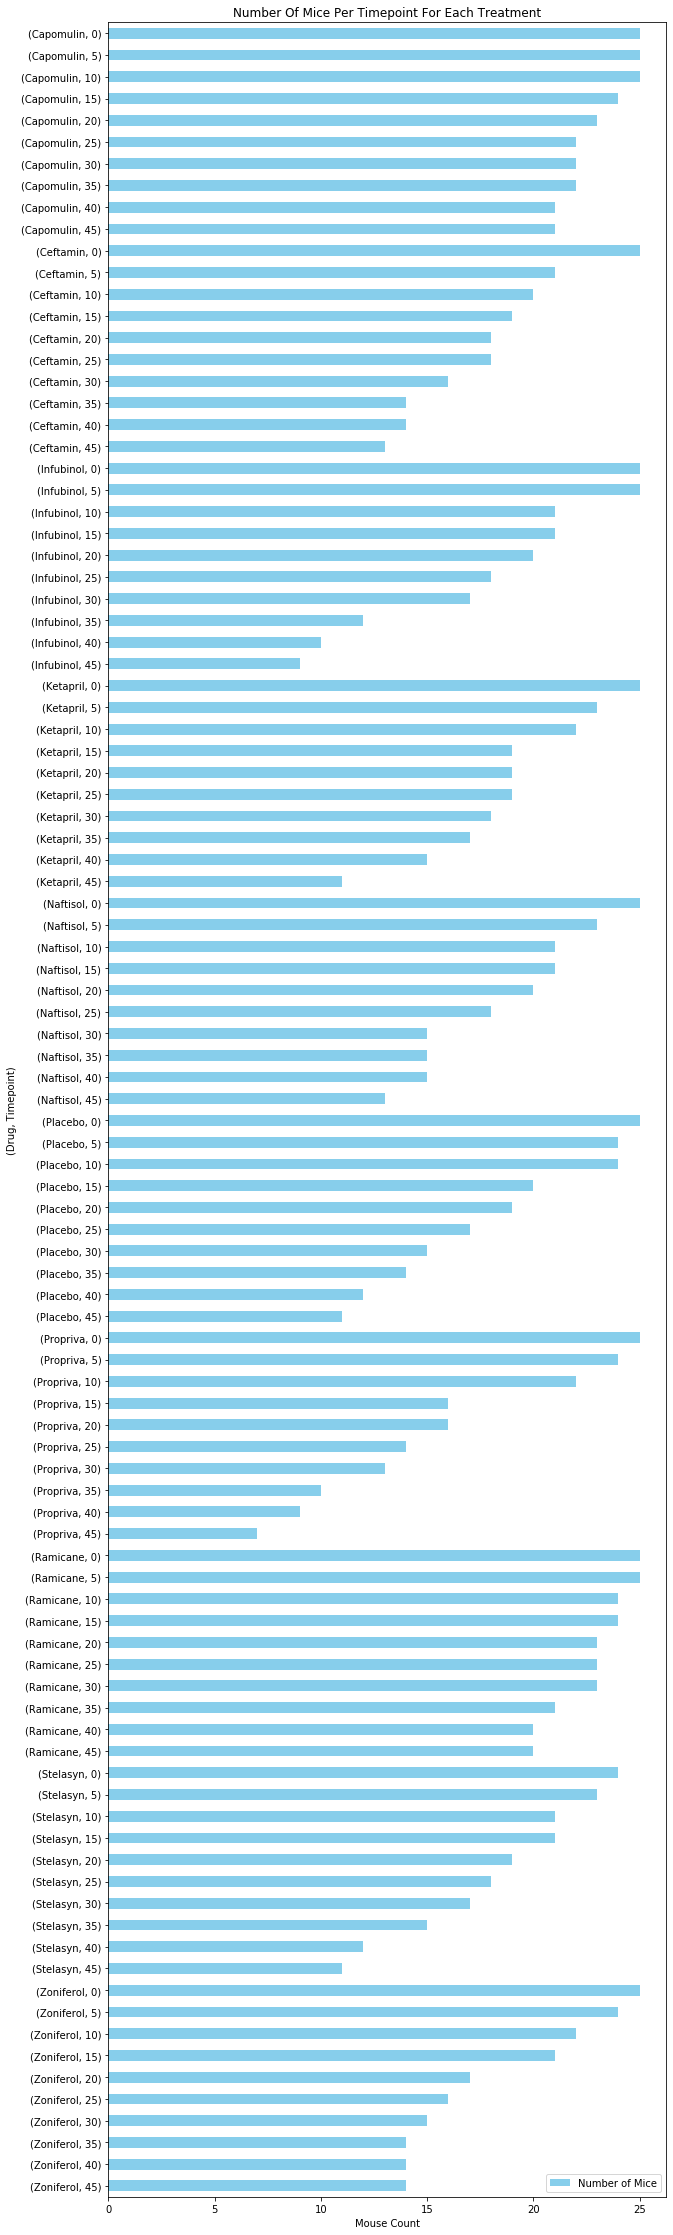

<Figure size 432x288 with 0 Axes>

In [14]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
cleaned_bar_df.plot(kind="barh", color='skyblue', figsize=(10,40))

plt.legend(['Number of Mice'])
plt.title('Number Of Mice Per Timepoint For Each Treatment')
plt.xlabel('Mouse Count')
plt.ylabel('(Drug, Timepoint)') 
plt.rcParams.update({'font.size': 8})
plt.show()
plt.tight_layout()

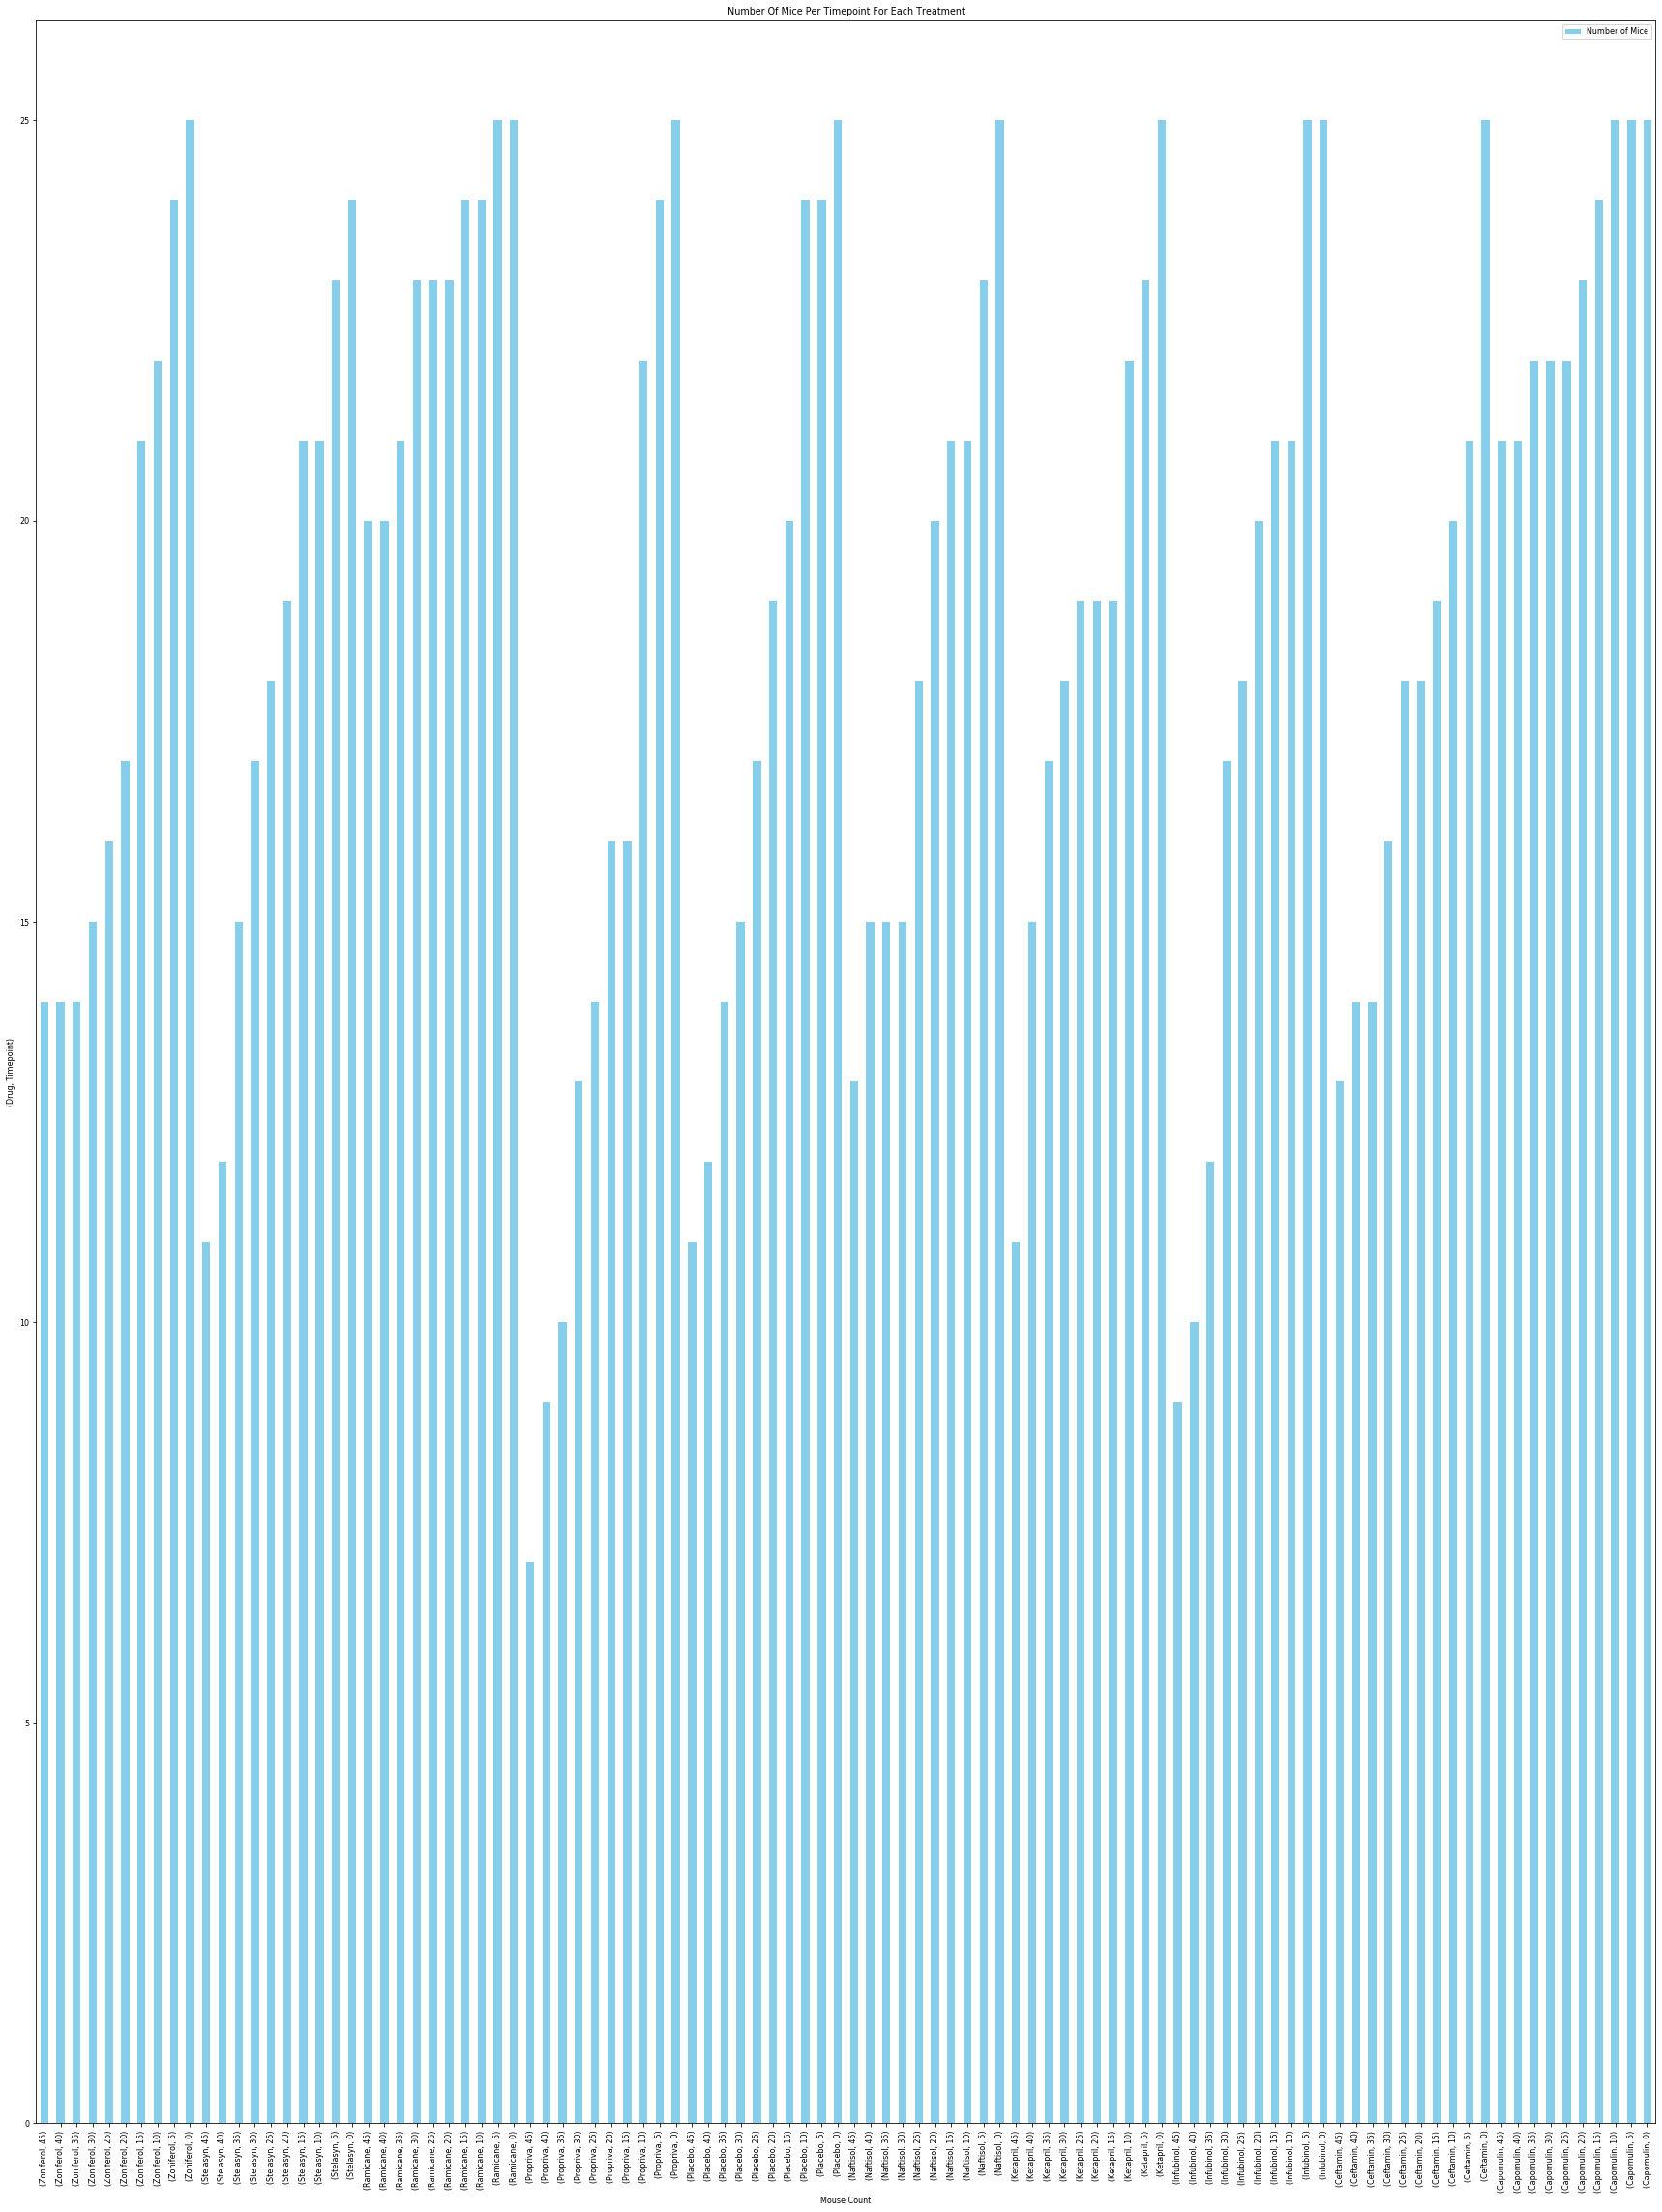

<Figure size 432x288 with 0 Axes>

In [89]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot
cleaned_bar_df.plot(kind="bar", color='skyblue', figsize=(30,40))

plt.legend(['Number of Mice'])
plt.title('Number Of Mice Per Timepoint For Each Treatment')
plt.xlabel('Mouse Count')
plt.ylabel('(Drug, Timepoint)') 
plt.show()
plt.tight_layout()


## Pie Plots 

In [16]:
pie_df = cleaned_df.loc[:,["ID", "Gender"]]

In [17]:
cleaned_df['Gender'].value_counts()

Male      958
Female    930
Name: Gender, dtype: int64

In [18]:
gender_counts = pie_df.groupby("Gender").count()
gender_list = list(gender_counts.index)
sizes = [gender_counts["ID"]]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


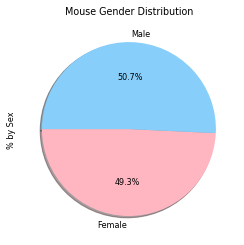

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors = ["lightpink", "lightskyblue"]

plt.pie(sizes, labels=gender_list, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)

plt.title("Mouse Gender Distribution")
plt.ylabel('% by Sex')

plt.show()

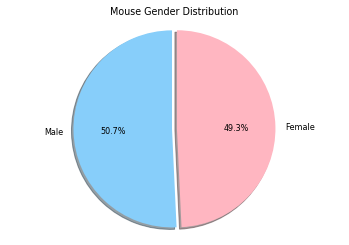

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = ["Male", "Female"]
mice = [958, 930]
colors = ["lightskyblue", "lightpink"]
explode = (0, 0.05)

plt.title("Mouse Gender Distribution")
plt.pie(mice, explode=explode, labels=gender, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [21]:
tumor_df = cleaned_df.loc[:,["ID", "Drug", "Tumor Volume", "Timepoint"]]
tumor_df

,ID,Drug,Tumor Volume,Timepoint
0,k403,Ramicane,45.00,0
1,k403,Ramicane,38.83,5
2,k403,Ramicane,35.01,10
3,k403,Ramicane,34.22,15
4,k403,Ramicane,33.00,20
...,...,...,...,...
1888,z969,Naftisol,63.15,25
1889,z969,Naftisol,65.84,30
1890,z969,Naftisol,69.18,35
1891,z969,Naftisol,70.31,40


In [22]:
#tumor_df["Timepoint"].value_counts()

In [23]:
#tumor_df.sort_values("Tumor Volume", ascending=True)
#tumor_df.head(10)

#4 Most Promising Drugs: 1) Ramicane, 2) Capomulin, 3) Propriva, 4) Ceftamin

In [24]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers.

In [36]:
# 1) Ramicane DataFrame
ramicane_df = tumor_df.loc[tumor_df["Drug"] == "Ramicane", :]

ramicane_final = ramicane_df.groupby('ID').max()['Timepoint']
ramicane_final_volume = pd.DataFrame(ramicane_final)
ramicane_final_merge = pd.merge(ramicane_final_volume, ramicane_df, on=("ID","Timepoint"),how="left")
ramicane_final_merge.head(5)

,ID,Timepoint,Drug,Tumor Volume
0,a411,45,Ramicane,38.41
1,a444,45,Ramicane,43.05
2,a520,45,Ramicane,38.81
3,a644,45,Ramicane,32.98
4,c458,30,Ramicane,38.34


In [52]:
# 1) Ramicane Tumors
ramicane_tumors = ramicane_final_merge["Tumor Volume"]

ramicane_quartiles = ramicane_tumors.quantile([.25,.5,.75])
ramicane_lower_q = ramicane_quartiles[0.25]
ramicane_upper_q = ramicane_quartiles[0.75]
ramicane_iqr = (ramicane_upper_q-ramicane_lower_q)

ramicane_lower_bound = ramicane_lower_q - (1.5*ramicane_iqr)
ramicane_upper_bound = ramicane_upper_q + (1.5*ramicane_iqr)

print(f"Outliers for the drug Ramicane include: values below {ramicane_lower_bound.round(2)}, and values above {ramicane_upper_bound.round(2)}.")


Outliers for the drug Ramicane include: values below 17.91, and values above 54.31.


In [53]:
# 2) Capomulin DataFrame
capomulin_df = tumor_df.loc[tumor_df["Drug"] == "Capomulin",:]
capomulin_final = capomulin_df.groupby('ID').max()['Timepoint']
capomulin_final_volume = pd.DataFrame(capomulin_final)
capomulin_final_merge = pd.merge(capomulin_final_volume, capomulin_df, on=("ID","Timepoint"),how="left")
capomulin_final_merge.head(5)

,ID,Timepoint,Drug,Tumor Volume
0,b128,45,Capomulin,38.98
1,b742,45,Capomulin,38.94
2,f966,20,Capomulin,30.49
3,g288,45,Capomulin,37.07
4,g316,45,Capomulin,40.16


In [54]:
# 2) Capomulin Tumors
capomulin_tumors = capomulin_final_merge["Tumor Volume"]

capomulin_quartiles = capomulin_tumors.quantile([.25,.5,.75])
capomulin_lower_q = capomulin_quartiles[0.25]
capomulin_upper_q = capomulin_quartiles[0.75]
capomulin_iqr = (capomulin_upper_q-capomulin_lower_q)

capomulin_lower_bound = capomulin_lower_q - (1.5*capomulin_iqr)
capomulin_upper_bound = capomulin_upper_q + (1.5*capomulin_iqr)

print(f"Outliers for the drug Capomulin include: values below {capomulin_lower_bound.round(2)}, and values above {capomulin_upper_bound.round(2)}.")


Outliers for the drug Capomulin include: values below 20.71, and values above 51.83.


In [55]:
# 3) Propriva DataFrame
propriva_df = tumor_df.loc[tumor_df["Drug"] == "Propriva", :]
propriva_final = propriva_df.groupby('ID').max()['Timepoint']
propriva_final_volume = pd.DataFrame(propriva_final)
propriva_final_merge = pd.merge(propriva_final_volume, propriva_df, on=("ID","Timepoint"),how="left")
propriva_final_merge.head(5)

,ID,Timepoint,Drug,Tumor Volume
0,a699,45,Propriva,62.19
1,c927,40,Propriva,64.18
2,g558,40,Propriva,61.77
3,g570,45,Propriva,70.49
4,g989,35,Propriva,62.57


In [56]:
# 3) Propriva Tumors
propriva_tumors = propriva_final_merge["Tumor Volume"]

propriva_quartiles = propriva_tumors.quantile([.25,.5,.75])
propriva_lower_q = propriva_quartiles[0.25]
propriva_upper_q = propriva_quartiles[0.75]
propriva_iqr = (propriva_upper_q-propriva_lower_q)

propriva_lower_bound = propriva_lower_q - (1.5*propriva_iqr)
propriva_upper_bound = propriva_upper_q + (1.5*propriva_iqr)

print(f"Outliers for the drug Propriva include: values below {propriva_lower_bound.round(2)}, and values above {propriva_upper_bound.round(2)}.")


Outliers for the drug Propriva include: values below 28.94, and values above 82.74.


In [57]:
# 4) Ceftamin DataFrame
ceftamin_df = tumor_df.loc[tumor_df["Drug"] == "Ceftamin", :]
ceftamin_final = ceftamin_df.groupby('ID').max()['Timepoint']
ceftamin_final_volume = pd.DataFrame(ceftamin_final)
ceftamin_final_merge = pd.merge(ceftamin_final_volume, ceftamin_df, on=("ID","Timepoint"),how="left")
ceftamin_final_merge.head(5)

,ID,Timepoint,Drug,Tumor Volume
0,a275,45,Ceftamin,63.00
1,b447,0,Ceftamin,45.00
2,b487,25,Ceftamin,56.06
3,b759,30,Ceftamin,55.74
4,f436,15,Ceftamin,48.72


In [58]:
# 4) Ceftamin Tumors
ceftamin_tumors = ceftamin_final_merge["Tumor Volume"]

ceftamin_quartiles = ceftamin_tumors.quantile([.25,.5,.75])
ceftamin_lower_q = ceftamin_quartiles[0.25]
ceftamin_upper_q = ceftamin_quartiles[0.75]
ceftamin_iqr = (ceftamin_upper_q-ceftamin_lower_q)

ceftamin_lower_bound = ceftamin_lower_q - (1.5*ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upper_q + (1.5*ceftamin_iqr)

print(f"Outliers for the drug Ceftamin include: values below {ceftamin_lower_bound.round(2)}, and values above {ceftamin_upper_bound.round(2)}.")


Outliers for the drug Ceftamin include: values below 25.35, and values above 87.67.


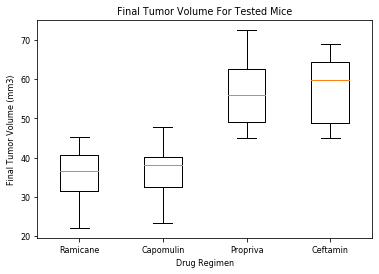

In [66]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

tumor_box_plot = [ramicane_tumors, capomulin_tumors, propriva_tumors, ceftamin_tumors]

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume For Tested Mice')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(tumor_box_plot, labels=["Ramicane","Capomulin","Propriva","Ceftamin",])

plt.savefig('boxplot')
plt.show()

## Line and Scatter Plots

In [67]:
# Create a DataFrame including: ID, Drug, Timepoint, Tumor Volume, Weight
lineplot_df = cleaned_df.loc[:,["ID", "Drug", "Timepoint", "Tumor Volume", "Weight (grams)"]]
lineplot_df.loc[lineplot_df["Drug"] == "Capomulin", :]

lineplot_df 

,ID,Drug,Timepoint,Tumor Volume,Weight (grams)
0,k403,Ramicane,0,45.00,16
1,k403,Ramicane,5,38.83,16
2,k403,Ramicane,10,35.01,16
3,k403,Ramicane,15,34.22,16
4,k403,Ramicane,20,33.00,16
...,...,...,...,...,...
1888,z969,Naftisol,25,63.15,30
1889,z969,Naftisol,30,65.84,30
1890,z969,Naftisol,35,69.18,30
1891,z969,Naftisol,40,70.31,30


In [69]:
# Create a DataFrame including: drug, time point, weight, and tumor volume for a mouse treated with Capomulin (drug)
capomulin_df = lineplot_df.loc[lineplot_df["Drug"] == "Capomulin", :]

capomulin_df.head()

,ID,Drug,Timepoint,Tumor Volume,Weight (grams)
10,s185,Capomulin,0,45.00,17
11,s185,Capomulin,5,43.88,17
12,s185,Capomulin,10,37.61,17
13,s185,Capomulin,15,38.18,17
14,s185,Capomulin,20,36.87,17


In [70]:
# Create a for a single mouse tested by Capomulin. 
capomulin_mouse_df = capomulin_df.loc[capomulin_df["ID"] == "s185",:]
capomulin_mouse_df.head()

,ID,Drug,Timepoint,Tumor Volume,Weight (grams)
10,s185,Capomulin,0,45.00,17
11,s185,Capomulin,5,43.88,17
12,s185,Capomulin,10,37.61,17
13,s185,Capomulin,15,38.18,17
14,s185,Capomulin,20,36.87,17


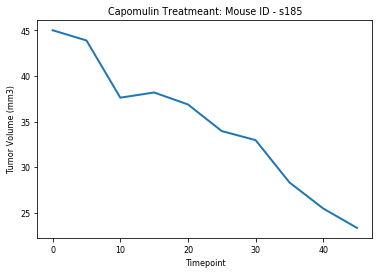

In [71]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
x_axis = capomulin_mouse_df["Timepoint"]
s185_tumor = capomulin_mouse_df["Tumor Volume"]

plt.title('Capomulin Treatmeant: Mouse ID - s185')
plt.plot(x_axis, s185_tumor,linewidth=2, markersize=12)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('linechart')
plt.show()

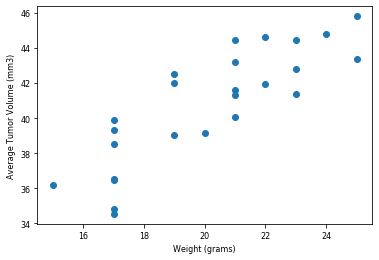

In [73]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_tumor_avg = capomulin_df.groupby(['ID']).mean()

plt.scatter(capomulin_tumor_avg['Weight (grams)'],capomulin_tumor_avg['Tumor Volume'])
plt.xlabel('Weight (grams)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('scatterplot')
plt.show()

## Correlation and Regression

In [79]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

In [81]:
# Calculation for the correlation coefficient
correlation = round(st.pearsonr(capomulin_tumor_avg['Weight (grams)'],capomulin_tumor_avg['Tumor Volume'])[0],2)
print(f"Correlation Coefficient = {correlation}")

Correlation Coefficient = 0.84


In [78]:
# Calculation for linear regression model
linear_reg = st.linregress(capomulin_tumor_avg['Weight (grams)'], capomulin_tumor_avg['Tumor Volume'])
linear_reg

LinregressResult(slope=0.9544350081366969, intercept=21.552150969623, rvalue=0.8419462637815035, pvalue=1.3216858166001126e-07, stderr=0.1275378025447789)

In [82]:
# Test Results
slope_result = 0.9544396890241045
intercept = 21.552160532685015

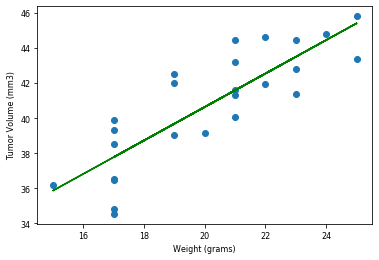

In [85]:
# Output linear regression model for mouse weight and average tumor volume
values = capomulin_tumor_avg['Weight (grams)'] * slope_result + intercept

plt.scatter(capomulin_tumor_avg['Weight (grams)'], capomulin_tumor_avg['Tumor Volume'])
plt.plot(capomulin_tumor_avg['Weight (grams)'], values, color="green")
plt.xlabel('Weight (grams)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('linearregression')
plt.show()